C:\Users\USer\AppData\Local\Temp\ipykernel_14556\2808681689.py:44: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Tahun', y='Total Kasus Asli (Ribu)', estimator='mean', ci=None, marker='o')


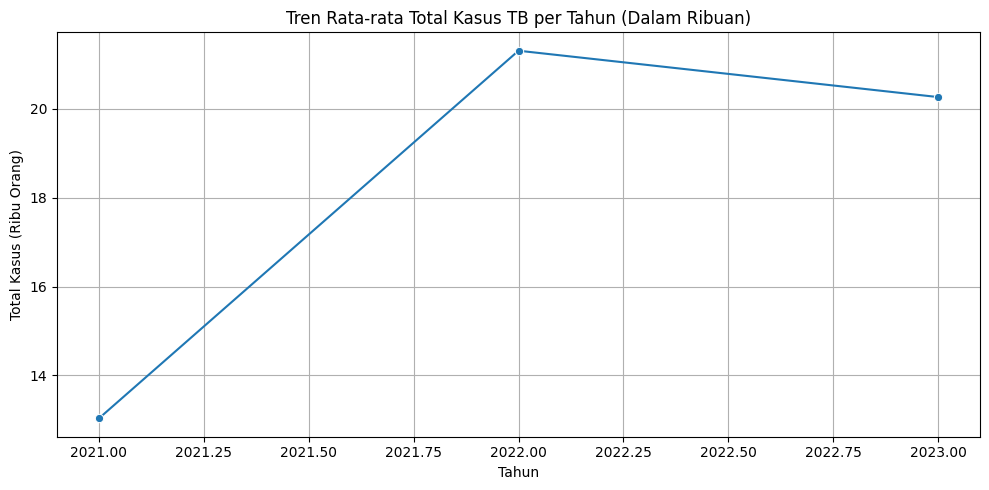

C:\Users\USer\AppData\Local\Temp\ipykernel_14556\2808681689.py:53: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Tahun', y='Persentase Penduduk Merokok', estimator='mean', ci=None, marker='s', color='orange')


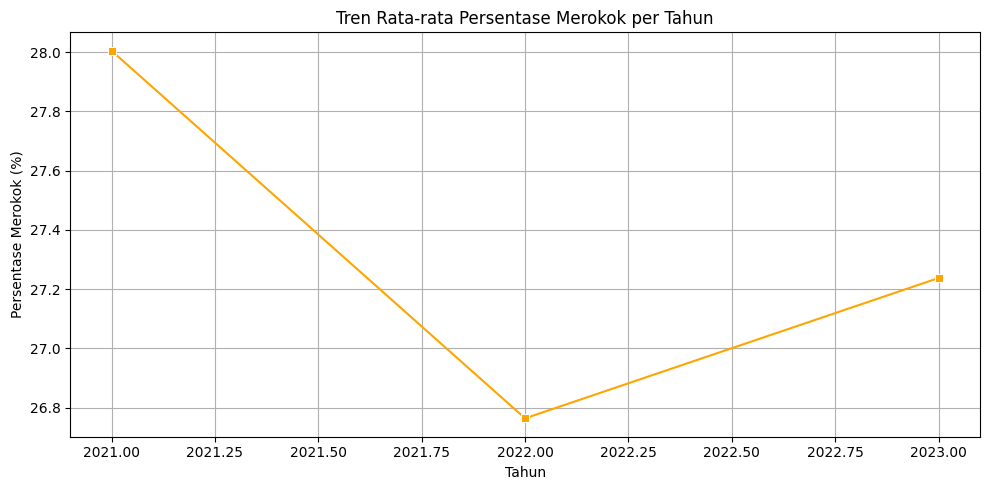

C:\Users\USer\AppData\Local\Temp\ipykernel_14556\2808681689.py:61: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Tahun', y='Indeks Kualitas Udara', estimator='mean', ci=None, marker='^', color='green')


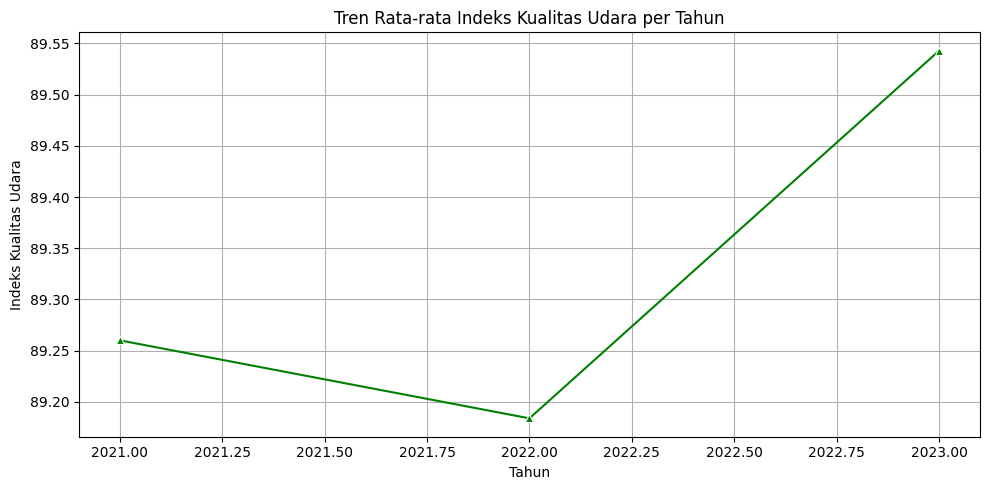


=== CLUSTERING KESELURUHAN (SEMUA TAHUN) ===


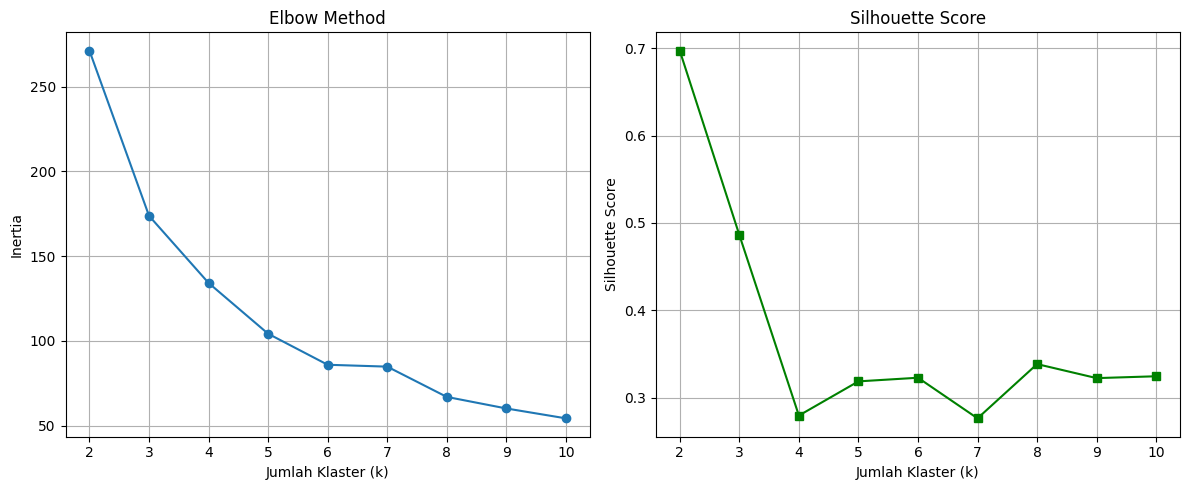


>> Jumlah klaster optimal berdasarkan Silhouette Score: 2


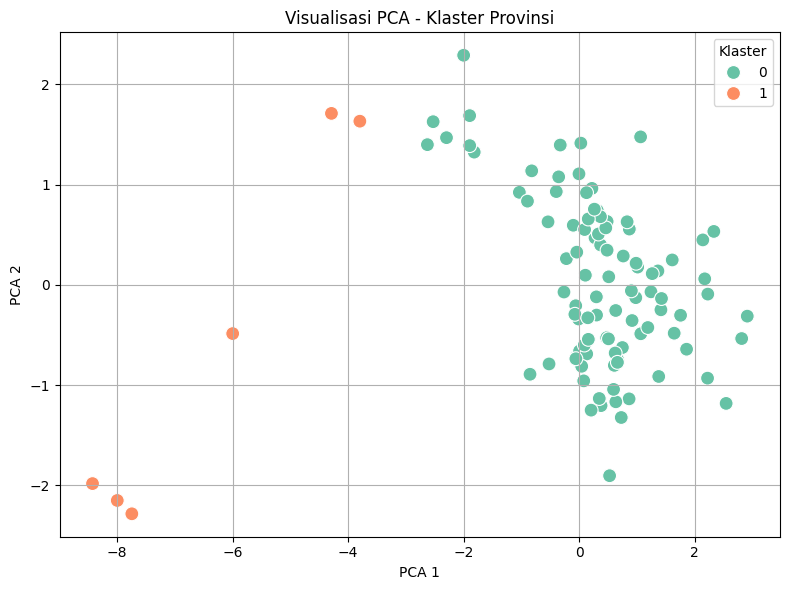


Silhouette Score Akhir (k=2): 0.6972

Rata-rata fitur per klaster:
             Jumlah Penduduk  Total Kasus  Persentase Penduduk Merokok  \
Cluster_All                                                              
0                  15.238508     9.058817                    27.280625   
1                  16.757374    10.914698                    28.208333   

             Indeks Kualitas Udara  
Cluster_All                         
0                        90.340521  
1                        73.143333  

>> Klaster 0: ['Aceh', 'Bali', 'Banten', 'Bengkulu', 'DI Yogyakarta', 'DKI Jakarta', 'Gorontalo', 'Jambi', 'Jawa Barat', 'Jawa Tengah', 'Jawa Timur', 'Kalimantan Barat', 'Kalimantan Selatan', 'Kalimantan Tengah', 'Kalimantan Timur', 'Kalimantan Utara', 'Kepulauan Bangka Belitung', 'Kepulauan Riau', 'Lampung', 'Maluku', 'Maluku Utara', 'Nusa Tenggara Barat', 'Nusa Tenggara Timur', 'Papua', 'Papua Barat', 'Riau', 'Sulawesi Barat', 'Sulawesi Selatan', 'Sulawesi Tengah', 'Sulawesi Teng

In [2]:
# =====================================================
# CRISP-DM STEP 1: BUSINESS UNDERSTANDING
# =====================================================
# Tujuan: Mengelompokkan provinsi berdasarkan faktor-faktor risiko TB
# agar dapat membantu intervensi kesehatan yang lebih terarah.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# =====================================================
# CRISP-DM STEP 2: DATA UNDERSTANDING & PREPARATION
# =====================================================

# Load dan bersihkan data
df = pd.read_csv('Dataset Kelompok 2_Kelas B.csv', sep=';')
df.columns = df.columns.str.strip()

features = ['Jumlah Penduduk', 'Total Kasus', 'Persentase Penduduk Merokok', 'Indeks Kualitas Udara']

# Konversi nilai koma ke titik & ubah ke float
for col in features:
    df[col] = df[col].astype(str).str.replace(',', '.').astype(float)

# Transformasi log untuk stabilkan outlier
for col in ['Jumlah Penduduk', 'Total Kasus']:
    df[col] = np.log1p(df[col])

df = df.dropna(subset=features + ['Tahun'])

# =====================================================
# ANALISIS TAMBAHAN: Visualisasi Tren per Tahun
# =====================================================

# Kembalikan dari log ke skala asli, lalu ubah ke ribuan
df['Total Kasus Asli (Ribu)'] = np.expm1(df['Total Kasus']) / 1000

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Tahun', y='Total Kasus Asli (Ribu)', estimator='mean', ci=None, marker='o')
plt.title('Tren Rata-rata Total Kasus TB per Tahun (Dalam Ribuan)')
plt.ylabel('Total Kasus (Ribu Orang)')
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Tahun', y='Persentase Penduduk Merokok', estimator='mean', ci=None, marker='s', color='orange')
plt.title('Tren Rata-rata Persentase Merokok per Tahun')
plt.ylabel('Persentase Merokok (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x='Tahun', y='Indeks Kualitas Udara', estimator='mean', ci=None, marker='^', color='green')
plt.title('Tren Rata-rata Indeks Kualitas Udara per Tahun')
plt.ylabel('Indeks Kualitas Udara')
plt.grid(True)
plt.tight_layout()
plt.show()

# =====================================================
# CRISP-DM STEP 3: MODELING - CLUSTERING KESELURUHAN
# =====================================================

print("\n=== CLUSTERING KESELURUHAN (SEMUA TAHUN) ===")

# Normalisasi dan PCA
scaler_all = RobustScaler()
X_all_scaled = scaler_all.fit_transform(df[features])

pca_pre_all = PCA(n_components=0.95, random_state=42)
X_all_pca = pca_pre_all.fit_transform(X_all_scaled)

# Elbow & Silhouette
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_all_pca)
    inertia.append(km.inertia_)
    silhouette_scores.append(silhouette_score(X_all_pca, labels))

# Visualisasi evaluasi jumlah klaster
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Inertia")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='s', color='green')
plt.title("Silhouette Score")
plt.xlabel("Jumlah Klaster (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)

plt.tight_layout()
plt.show()

# Pilih k terbaik
optimal_k = K_range[np.argmax(silhouette_scores)]
print(f"\n>> Jumlah klaster optimal berdasarkan Silhouette Score: {optimal_k}")

# Clustering final
kmeans_all = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster_All'] = kmeans_all.fit_predict(X_all_pca)

# PCA untuk visualisasi
pca_all_vis = PCA(n_components=2, random_state=42)
X_vis_all = pca_all_vis.fit_transform(X_all_scaled)
df['PCA1_All'] = X_vis_all[:, 0]
df['PCA2_All'] = X_vis_all[:, 1]

# Visualisasi hasil klaster
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1_All', y='PCA2_All', hue='Cluster_All', palette='Set2', s=100)
plt.title("Visualisasi PCA - Klaster Provinsi")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.legend(title='Klaster')
plt.tight_layout()
plt.show()

# =====================================================
# CRISP-DM STEP 4: EVALUATION
# =====================================================

score_all = silhouette_score(X_all_pca, df['Cluster_All'])
print(f"\nSilhouette Score Akhir (k={optimal_k}): {score_all:.4f}")

cluster_summary = df.groupby('Cluster_All')[features].mean()
print("\nRata-rata fitur per klaster:")
print(cluster_summary)

for cluster in sorted(df['Cluster_All'].unique()):
    prov = df[df['Cluster_All'] == cluster]['Provinsi'].tolist()
    print(f"\n>> Klaster {cluster}: {prov}")

# =====================================================
# CRISP-DM STEP 5: DEPLOYMENT / OUTPUT
# =====================================================

df.to_csv("hasil_clustering_keseluruhan.csv", index=False)
cluster_summary.reset_index().to_csv("ringkasan_klaster_keseluruhan.csv", index=False)

df_silhouette_k = pd.DataFrame({
    'Jumlah_Klaster': list(K_range),
    'Silhouette_Score': silhouette_scores,
    'Inertia': inertia
})
df_silhouette_k.to_csv("evaluasi_klaster_keseluruhan.csv", index=False)

print("\nSumber Data:")
print("- Kementerian Kesehatan RI (Jumlah Penduduk & Total Kasus)")
print("- Badan Pusat Statistik (Persentase Merokok)")
print("- Direktorat Pengendalian Pencemaran Udara (Indeks Kualitas Udara)")
